有幾位學生:
100
一開始有多少錢:
520
猜輸一次多少錢:
60
遊戲方式:
a
猜拳猜幾次:
5000
[640, 620, 0, 520, 0, 0, 0, 800, 0, 0, 0, 0, 760, 820, 340, 680, 0, 0, 460, 1060, 1000, 820, 0, 0, 620, 1480, 600, 0, 0, 0, 820, 0, 0, 0, 940, 340, 520, 0, 760, 580, 0, 880, 320, 700, 760, 0, 0, 1640, 820, 1120, 0, 980, 1220, 260, 1300, 700, 460, 0, 340, 0, 0, 0, 0, 0, 580, 0, 0, 0, 0, 0, 0, 0, 0, 0, 820, 640, 520, 340, 0, 580, 940, 980, 340, 160, 140, 860, 680, 460, 200, 0, 0, 640, 40, 760, 1120, 760, 0, 0, 0, 1120]
(array([47.,  3.,  8., 12., 10., 11.,  5.,  2.,  0.,  2.]), array([   0.,  164.,  328.,  492.,  656.,  820.,  984., 1148., 1312.,
       1476., 1640.]), <a list of 10 Patch objects>)
[  82.  246.  410.  574.  738.  902. 1066. 1230. 1394. 1558.]
[104.85694549] [[255.66763967]]


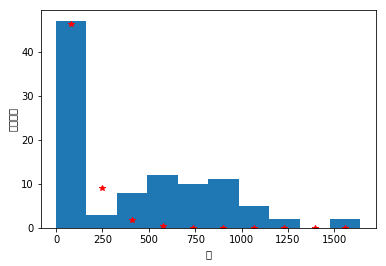

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random 


print('有幾位學生:')
student = int(input())  #有幾位學生
print('一開始有多少錢:')
money   = int(input())  #一開始有多少錢
print('猜輸一次多少錢:')
lost_money = int(input()) #猜輸一次多少錢
print('遊戲方式:')
way     = input() # 方式a:不可負債 /方式b:可負債
print('猜拳猜幾次:')
times   = int(input()) #猜拳猜幾次

student_money = list() #建立一個學生有多少錢的列表
student_money = [money] * student #初始化一開始的錢
if way == 'a': #方式a
    while times != 0:
        times = times - 1
        rs = random.sample(range(0,student),2)   #隨機挑出兩個人
        winner = random.randint(0,3)             #誰獲勝 
        
        if winner == 2:
            continue
        
        if student_money[rs[0]] == 0 or student_money[rs[1]] == 0: #沒錢的人玩不算數
            times += 1
            continue
        if winner == 0:
            if student_money[rs[1]] >= lost_money:
                student_money[rs[0]] = student_money[rs[0]] + lost_money 
                student_money[rs[1]] = student_money[rs[1]] - lost_money
            else:
                student_money[rs[0]] = student_money[rs[0]] + student_money[rs[1]] 
                student_money[rs[1]] = 0
        if winner == 1:
            if student_money[rs[0]] >= lost_money:
                student_money[rs[1]] = student_money[rs[1]] + lost_money 
                student_money[rs[0]] = student_money[rs[0]] - lost_money
            else:
                student_money[rs[1]] = student_money[rs[1]] + student_money[rs[0]] 
                student_money[rs[1]] = 0        
if way == 'b': #方式b
    while times != 0:
        times = times - 1
        rs = random.sample(range(0,student),2)   #隨機挑出某兩個人
        winner = random.randint(0,2)             #誰獲勝     
        if winner == 0:
            student_money[rs[0]] = student_money[rs[0]] + lost_money 
            student_money[rs[1]] = student_money[rs[1]] - lost_money
        if winner == 1:
            student_money[rs[1]] = student_money[rs[1]] + lost_money 
            student_money[rs[0]] = student_money[rs[0]] - lost_money
                
print(student_money)   

a=plt.hist(student_money,10)
print(a)
dx=(a[1][1]-a[1][0])
bin_center=np.array(a[1][0:-1])+dx/2
print(bin_center)

from scipy import optimize
def test_func(x, amp):
    return amp*np.exp(-x/student)

params, params_covariance = optimize.curve_fit(test_func,bin_center,a[0])
print(params,params_covariance)

plt.plot(bin_center,test_func(bin_center,params[0]),"r*",label='Fitted function')

         
plt.xlabel("錢")
plt.ylabel("學生總數")
plt.show()
